# Merging Food101 and Ingredients101

### Food101:
- 101 food categories
```
data
│
└───food-101
│   │
│   └───images
│   │   │
│   │   └───apple_pie
│   │   │  │
│   │   │  └───134.jpg
│   │   │  └───21063.jpg
│   │   │  └───...
│   │   │
│   │   └───baby_back_ribs
│   │   │  │
│   │   │  └───534.jpg
│   │   │  └───1234.jpg
│   │   │  └───...
│   │   │
│   │   └───...
│   │
│   └───meta
│       │
│       └───classes.txt
│       └───test.json
│       └───train.json
│       └───labels.txt
```

### Ingredients101:
- same 101 food categories
- base folder: `data/Ingredients101`

README:
>This dataset is complementary to the images present in Food101 [1]. Following we describe the files available in each of the folders:
>
>annotations/<set_split>_images.txt - list of images belonging to each of the data splits, where <set_split> can be either 'train', 'val' or 'test'.
>
>annotations/<set_split>_labels.txt - list of indices for each of the images in <set_split>_images.txt. Each index points to the corresponing line in ingredients_Recipes5k.txt
>
>annotations/ingredients.txt - comma separated file that contains, in each line, the list of ingredients present in a certain class of the dataset.
>
>annotations/classes.txt - list of classes of the dataset Food101.


### Target dataset:

example (jsonl);
```json
{"prefix": "", "suffix": "pastry,butter,flour,granulated white sugar,brown sugar,baking apples,ground cinnamon,nutmeg", "image": "apple_pie/134.jpg"}
{"prefix": "", "suffix": "pork ribs,barbecue sauce,garlic powder,onion powder,paprika,black pepper,salt", "image": "baby_back_ribs/534.jpg"}
...
```

... for both train and test splits.

In [4]:
FOOD_DATA_DIR = 'data/food-101'
INGREDIENTS_DATA_DIR = 'data/Ingredients101'

# dir for merged data
DATA_DIR = 'data/food-ingredients-101'

In [18]:
import os
import json

def merge_data(food_data_dir, ingredients_data_dir, data_dir):
    # Create the data directory if it doesn't exist
    os.makedirs(data_dir, exist_ok=True)
    
    # Define the paths to the required files
    food_train_file = os.path.join(food_data_dir, 'meta', 'train.json')
    food_test_file = os.path.join(food_data_dir, 'meta', 'test.json')
    ingredients_train_images = os.path.join(ingredients_data_dir, 'annotations', 'train_images.txt')
    ingredients_train_labels = os.path.join(ingredients_data_dir, 'annotations', 'train_labels.txt')
    ingredients_test_images = os.path.join(ingredients_data_dir, 'annotations', 'test_images.txt')
    ingredients_test_labels = os.path.join(ingredients_data_dir, 'annotations', 'test_labels.txt')
    ingredients_file = os.path.join(ingredients_data_dir, 'annotations', 'ingredients.txt')
    
    # Load the ingredients data
    with open(ingredients_file, 'r') as f:
        ingredients_list = [line.strip() for line in f.readlines()]
    
    # Create a dictionary to map each class to its ingredients
    class_to_ingredients = {i: ingredients for i, ingredients in enumerate(ingredients_list)}
    
    def create_jsonl(image_file, label_file, split):
        with open(image_file, 'r') as f:
            image_paths = [line.strip() for line in f.readlines()]
        
        with open(label_file, 'r') as f:
            labels = [int(line.strip()) for line in f.readlines()]
        
        if len(image_paths) != len(labels):
            raise ValueError("The number of images and labels do not match.")
        
        output_file = os.path.join(data_dir, f'{split}.jsonl')
        with open(output_file, 'w') as f_out:
            for image_path, label in zip(image_paths, labels):
                ingredients = class_to_ingredients[label]
                suffix = ','.join(ingredients.split(','))
                record = {
                    "prefix": "",
                    "suffix": suffix,
                    "image": food_data_dir + '/images/' + image_path + '.jpg',
                }
                f_out.write(json.dumps(record) + '\n')
    
    # Process the train and test splits
    create_jsonl(ingredients_train_images, ingredients_train_labels, 'train')
    create_jsonl(ingredients_test_images, ingredients_test_labels, 'test')

# Example usage
merge_data('data/food-101', 'data/Ingredients101', 'data/food-ingredients-101')

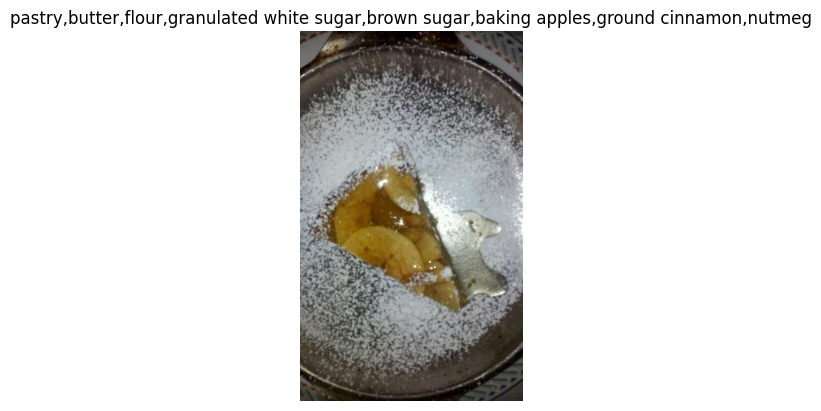

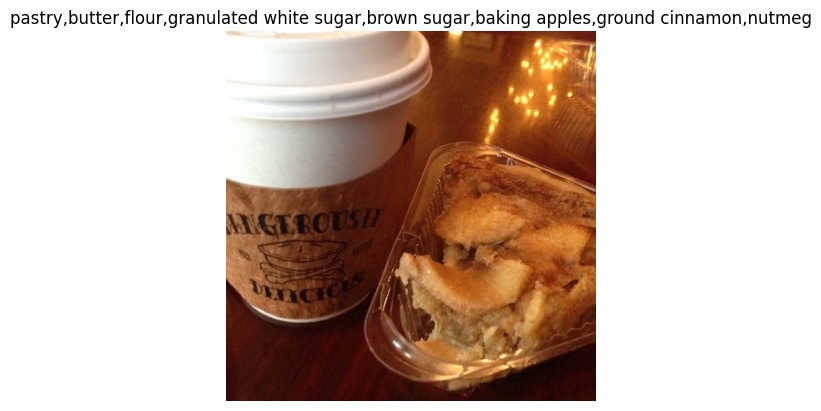

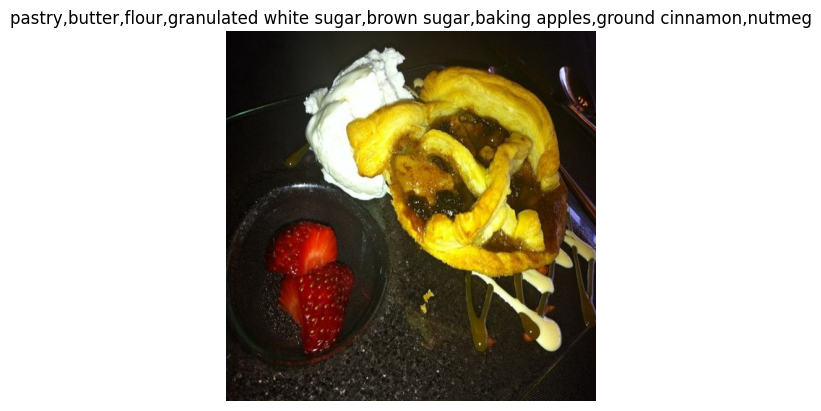

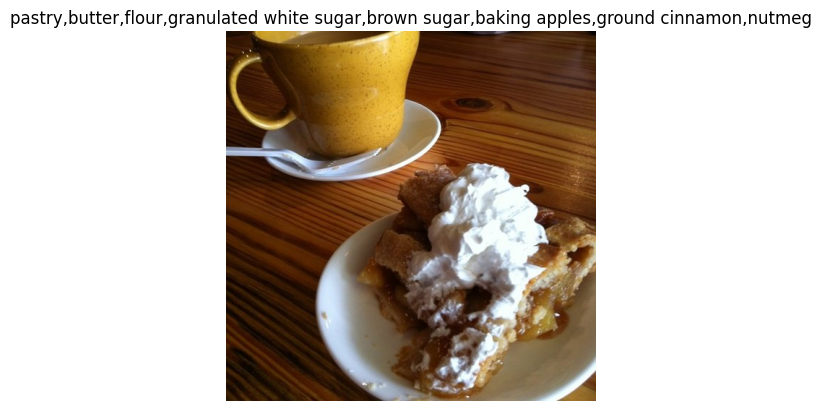

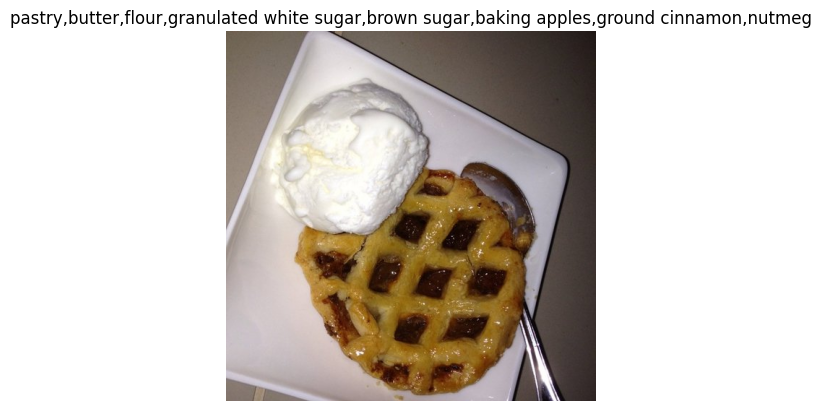

In [19]:
# manually inspect some of the food images with their ingredients
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def inspect_data(data_dir, split, num_samples=5):
    file_path = os.path.join(data_dir, f'{split}.jsonl')
    with open(file_path, 'r') as f:
        records = [json.loads(line) for line in f.readlines()]
    
    for record in records[:num_samples]:
        image_path = record['image']
        ingredients = record['suffix']
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(ingredients)
        plt.axis('off')
        plt.show()

# Example usage
inspect_data('data/food-ingredients-101', 'train', num_samples=5)